# Práctica de Laboratorio 2: Regresión Logística

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
archivos = ["diabetes","Enfermedad_Cardiaca"]

In [44]:
def leer_datos(archivo):
    return np.genfromtxt(archivo+".csv", delimiter='\t', skip_header=1)

def dividir_X_y(datos):
    X = datos[:,:-1]
    y = datos[:,-1:]
    return X, y

def normalizar_datos(datos):
    for i in range (0,np.size(data[0])-1):
        media = np.mean(data[:,i])
        desvi =np.std(data[:,i])
        data[:,i] = (data[:,i] - media)/desvi
    return datos, media, desvi

def sigmoidal(X, t):
    return 1 / (1 + np.exp(-np.matmul(X, t)))

def calcular_funcion_costo(X, y, t):
    htx = sigmoidal(X, t)
    costo = np.sum( (y * np.log(htx)) + ((1-y) * np.log(1-htx)) )
    costo = (-costo)/X.shape[0]
    return costo

def calcular_gradiente(X, y, t):
    gradiente = sigmoidal(X, t) - y
    gradiente = np.matmul(np.transpose(X), gradiente)
    gradiente = np.divide(gradiente, y.shape[0])
    return gradiente

def gradiente_descendiente(X, y, t, num_it, tasa_apren):
    costos = np.zeros(num_it)
    for i in range(num_it):
        gradiente = calcular_gradiente(X, y, t)
        t = t - np.multiply(gradiente, tasa_apren)
        costos[i] = calcular_funcion_costo(X, y, t)
    return t, costos

def calcular_accuraccy(X, y, t):
    htxP = sigmoidal(X, t) > 0.5
    n_1s = np.logical_xor(np.logical_not(htxP), y)
    return np.sum(n_1s) / y.shape[0]

def crear_k_folds(data_Nor, k):
    np.random.shuffle(data_Nor)
    size_fold = int(data_Nor.shape[0] / k)
    resto = int(data_Nor.shape[0] % k)
    data_Nor = data_Nor[:data_Nor.shape[0]-resto,:]
    k_folds = []
    index = 0
    for i in range(k):
        k_folds.append(data_Nor[index:index+size_fold, :])
        index += size_fold
    return k_folds, size_fold


## Experimento 1

In [45]:
n_it = [500, 1000, 1500, 2000, 2500, 3000, 3500]
tasas_aprendizaje = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
k = 3

for archivo in archivos:
    data = leer_datos(archivo)
    data = normalizar_datos(data)[0]
    k_folds, size_fold = crear_k_folds(data, k)

    tabla_accuraccy = []
    for it in n_it:
        learn_rate_row = []
        for tasa in tasas_aprendizaje:
            media_accuraccy = 0.0
            for i in range(k):
                X_train = np.zeros((size_fold * (k - 1), data.shape[1] - 1))
                X_test = np.zeros((size_fold, data.shape[1] - 1))
                y_train = np.zeros((size_fold * (k - 1), 1))
                y_test = np.zeros((size_fold, 1))

                index = 0
                for j in range(k):
                    if j == i:
                        X_test, y_test  = dividir_X_y(k_folds[i])
                    else:
                        X_train[index:index + size_fold, :], y_train[index:index + size_fold, :] = dividir_X_y(k_folds[j])
                        index += size_fold

                y_train = np.reshape(y_train, y_train.shape[0])
                y_test = np.reshape(y_test, y_test.shape[0])

                t = np.zeros(X_train.shape[1])
                t = gradiente_descendiente(X_train, y_train, t, it, tasa)[0]

                media_accuraccy += calcular_accuraccy(X_test, y_test, t)

            media_accuraccy /= k
            learn_rate_row.append(media_accuraccy)
        tabla_accuraccy.append(learn_rate_row)
    tabla_accuraccy = pd.DataFrame(tabla_accuraccy, columns=tasas_aprendizaje, index=n_it)
    print(archivo)
    print(tabla_accuraccy)

diabetes
          0.01      0.05      0.10      0.20      0.30      0.40
500   0.738281  0.736979  0.730469  0.735677  0.735677  0.735677
1000  0.736979  0.730469  0.735677  0.735677  0.735677  0.735677
1500  0.736979  0.734375  0.735677  0.735677  0.735677  0.735677
2000  0.736979  0.735677  0.735677  0.735677  0.735677  0.735677
2500  0.736979  0.735677  0.735677  0.735677  0.735677  0.735677
3000  0.734375  0.735677  0.735677  0.735677  0.735677  0.735677
3500  0.731771  0.735677  0.735677  0.735677  0.735677  0.735677
Enfermedad_Cardiaca
          0.01      0.05      0.10      0.20      0.30      0.40
500   0.844884  0.821782  0.815182  0.811881  0.811881  0.811881
1000  0.848185  0.815182  0.811881  0.811881  0.811881  0.811881
1500  0.844884  0.811881  0.811881  0.811881  0.811881  0.811881
2000  0.834983  0.811881  0.811881  0.811881  0.811881  0.811881
2500  0.821782  0.811881  0.811881  0.811881  0.811881  0.811881
3000  0.821782  0.811881  0.811881  0.811881  0.811881  0.811

## Experimento 2

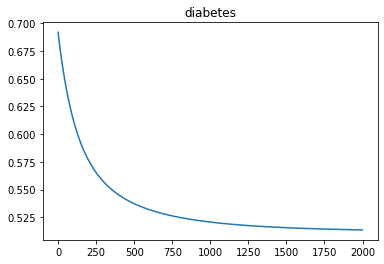

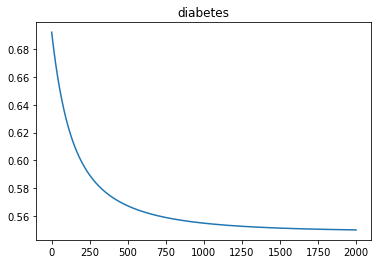

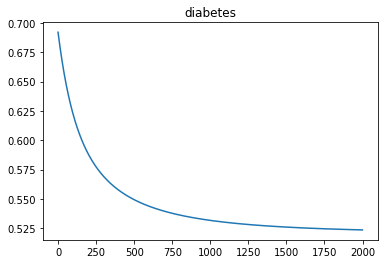

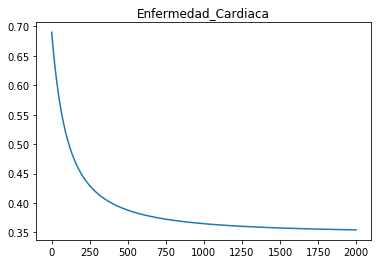

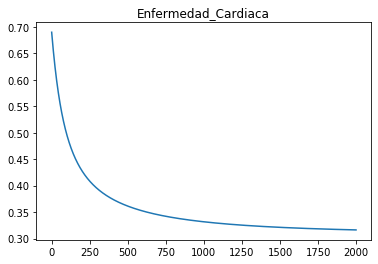

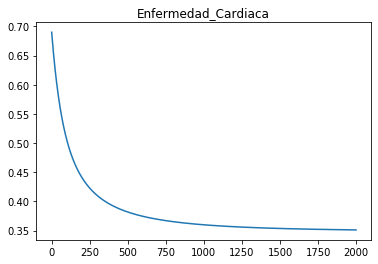

In [46]:
tasa = 0.01
n_it = 2000
k = 3

for archivo in archivos:
    data = leer_datos(archivo)
    data = normalizar_datos(data)[0]
    k_folds, size_fold = crear_k_folds(data, k)

    for i in range(k):
        X_train = np.zeros((size_fold * (k - 1), data.shape[1] - 1))
        X_test = np.zeros((size_fold, data.shape[1] - 1))
        y_train = np.zeros((size_fold * (k - 1), 1))
        y_test = np.zeros((size_fold, 1))

        index = 0
        for j in range(k):
            if j == i:
                X_test, y_test  = dividir_X_y(k_folds[i])
            else:
                X_train[index:index + size_fold, :], y_train[index:index + size_fold, :] = dividir_X_y(k_folds[j])
                index += size_fold

        y_train = np.reshape(y_train, y_train.shape[0])
        y_test = np.reshape(y_test, y_test.shape[0])
        
        t = np.zeros(X_train.shape[1])
        costos = gradiente_descendiente(X_train, y_train, t, n_it, tasa)[1]
        plt.title(archivo)
        plt.plot(costos)
        plt.show()